<a href="https://colab.research.google.com/github/sb2356-iiitr/Covid19-eda/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries and reading the data

In [43]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

In [44]:
# Reading dataset
df = pd.read_json('https://www.mohfw.gov.in/data/datanew.json')

# Date and time of fetching data
IST = pytz.timezone('Asia/Kolkata')
now = datetime.now(IST)
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Data as of: ", dt_string, "IST")	

Data as of:  27/09/2021 10:53:09 IST


In [45]:
df

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,16,7618,7473,129,13,7618,7476,129,35
1,1,Andhra Pradesh,13208,2045657,2018324,14125,13048,2046841,2019657,14136,28
2,3,Arunachal Pradesh,358,54349,53717,274,323,54352,53755,274,12
3,4,Assam,4661,600423,589924,5838,4545,600619,590231,5843,18
4,5,Bihar,65,725937,716212,9660,68,725944,716216,9660,10
5,6,Chandigarh,44,65209,64346,819,41,65210,64350,819,04
6,7,Chhattisgarh,294,1005229,991371,13564,285,1005242,991393,13564,22
7,8,Dadra and Nagar Haveli and Daman and Diu,0,10670,10666,4,0,10670,10666,4,26
8,10,Delhi,379,1438685,1413221,25085,371,1438714,1413258,25085,07
9,11,Goa,946,176021,171776,3299,918,176095,171874,3303,30


### Understanding the data

In [46]:
# Dimensions of the table (rows, columns)
df.shape

(37, 11)

In [47]:
# Checking for null values
df.isna().sum()

sno             0
state_name      0
active          0
positive        0
cured           0
death           0
new_active      0
new_positive    0
new_cured       0
new_death       0
state_code      0
dtype: int64

In [48]:
# Data types of columns
df.dtypes

sno              int64
state_name      object
active           int64
positive         int64
cured            int64
death            int64
new_active       int64
new_positive     int64
new_cured        int64
new_death        int64
state_code      object
dtype: object

In [49]:
# Descriptive statistics of the data like mean,
# standard deviation, min and max values present
# in the dataset
df.describe()

,sno,active,positive,cured,death,new_active,new_positive,new_cured,new_death
count,37.000000,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000,3.700000e+01,3.700000e+01,37.000000
mean,319.054054,16404.108108,1.819067e+06,1.778505e+06,24157.729730,16195.675676,1.820475e+06,1.780107e+06,24172.648649
std,1823.499245,55878.359574,5.549570e+06,5.423728e+06,75201.494712,55191.968370,5.554014e+06,5.428749e+06,75245.947679
min,1.000000,0.000000,7.618000e+03,7.473000e+03,4.000000,0.000000,7.618000e+03,7.476000e+03,4.000000
25%,11.000000,157.000000,8.405300e+04,7.730200e+04,819.000000,156.000000,8.406600e+04,7.752000e+04,819.000000
50%,20.000000,465.000000,6.004230e+05,5.846810e+05,5838.000000,445.000000,6.006190e+05,5.847120e+05,5843.000000
75%,29.000000,4701.000000,1.023735e+06,1.010183e+06,14125.000000,4612.000000,1.024320e+06,1.010829e+06,14136.000000
max,11111.000000,303476.000000,3.365274e+07,3.290235e+07,446918.000000,299620.000000,3.367879e+07,3.293197e+07,447194.000000


In [50]:
# Displaying column names
df.keys()

Index(['sno', 'state_name', 'active', 'positive', 'cured', 'death',
       'new_active', 'new_positive', 'new_cured', 'new_death', 'state_code'],
      dtype='object')

In [51]:
# Count distinct observations over requested axis
df.nunique()

sno             37
state_name      37
active          37
positive        37
cured           37
death           37
new_active      37
new_positive    37
new_cured       37
new_death       37
state_code      37
dtype: int64

In [52]:
df.tail()
# We have an extra row at the bottom of the dataset
# which contains total of all numerical columns

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
32,33,Tripura,293,84053,82949,811,278,84066,82977,811,16
33,35,Uttarakhand,228,343474,335853,7393,226,343490,335871,7393,05
34,36,Uttar Pradesh,177,1709761,1686694,22890,176,1709772,1686706,22890,09
35,37,West Bengal,7674,1565645,1539244,18727,7683,1566393,1539974,18736,19
36,11111,,303476,33652745,32902351,446918,299620,33678786,32931972,447194,


In [53]:
# Select all rows except the last row
df = df.iloc[:36]
df

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,16,7618,7473,129,13,7618,7476,129,35
1,1,Andhra Pradesh,13208,2045657,2018324,14125,13048,2046841,2019657,14136,28
2,3,Arunachal Pradesh,358,54349,53717,274,323,54352,53755,274,12
3,4,Assam,4661,600423,589924,5838,4545,600619,590231,5843,18
4,5,Bihar,65,725937,716212,9660,68,725944,716216,9660,10
5,6,Chandigarh,44,65209,64346,819,41,65210,64350,819,04
6,7,Chhattisgarh,294,1005229,991371,13564,285,1005242,991393,13564,22
7,8,Dadra and Nagar Haveli and Daman and Diu,0,10670,10666,4,0,10670,10666,4,26
8,10,Delhi,379,1438685,1413221,25085,371,1438714,1413258,25085,07
9,11,Goa,946,176021,171776,3299,918,176095,171874,3303,30


Finding total using sum function

In [54]:
# Total no. of active cases
df['active'].sum()

303476

In [55]:
# Total no. of positive cases
df['positive'].sum()

33652745

In [56]:
# Total number of cured cases
df['cured'].sum()

32902351

In [57]:
# Total no. of death due to Covid 19
df['death'].sum()

446918

In [58]:
# Total number of new positive cases of the day
df['new_positive'].sum()

33678786

In [59]:
# Total number of new active cases of the day
df['new_active'].sum()

299620

In [60]:
# Total number of new cured cases of the day
df['new_cured'].sum()

32931972

In [61]:
# Total number of deaths of the day
df['new_death'].sum()

447194

### Data Visualization

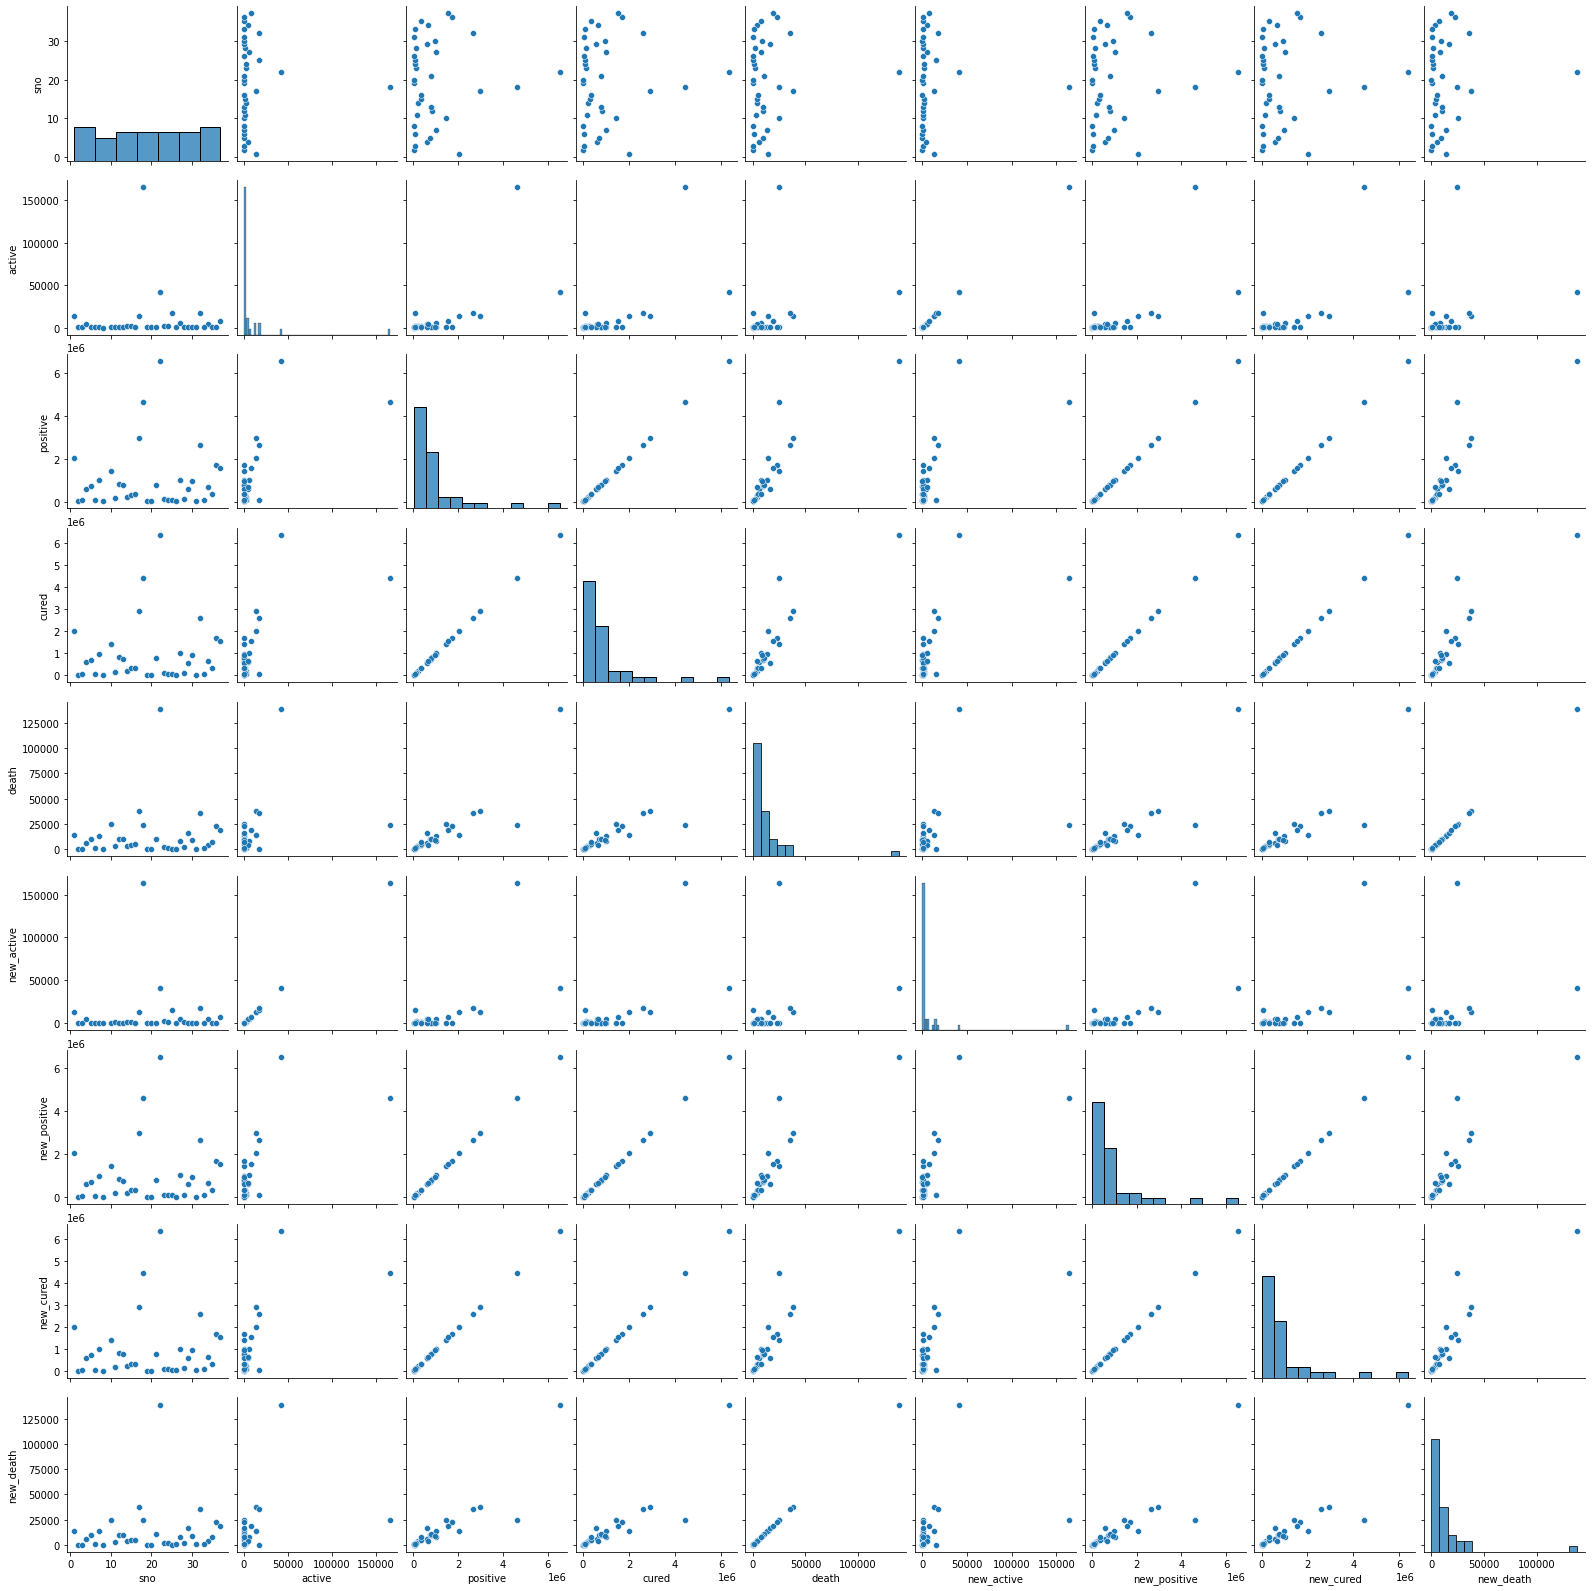

In [62]:
# Plotting scatter plots of all data using pairplot
sns.pairplot(data=df)

In [63]:
# Storing total cases in cases_df
cases_df = df.sum()

In [64]:
# Subset of original dataset
cases_df

sno                                                           694
state_name      Andaman and Nicobar IslandsAndhra PradeshAruna...
active                                                     303476
positive                                                 33652745
cured                                                    32902351
death                                                      446918
new_active                                                 299620
new_positive                                             33678786
new_cured                                                32931972
new_death                                                  447194
state_code      3528121810042226073024060201202932373123271417...
dtype: object

In [65]:
# Dropping unnecessary columns
cases_df.drop(['sno', 'state_name', 'state_code'], inplace=True)

In [66]:
cases_df

active            303476
positive        33652745
cured           32902351
death             446918
new_active        299620
new_positive    33678786
new_cured       32931972
new_death         447194
dtype: object

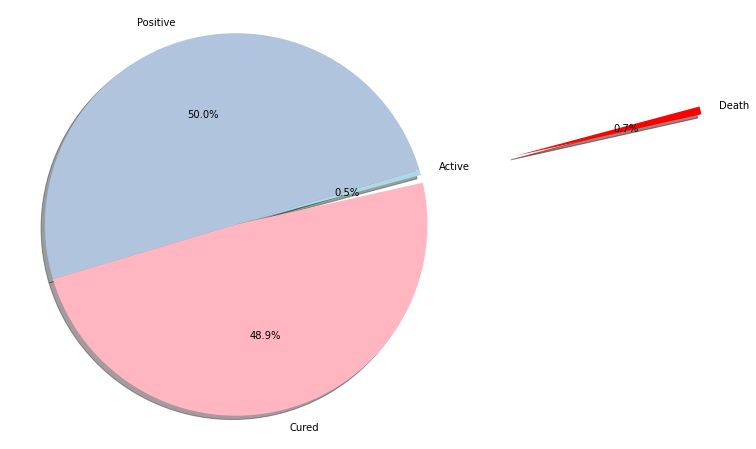

In [67]:
# Pie chart visualization
my_data = cases_df.tolist()[:4]
my_labels = 'Active', 'Positive', 'Cured', 'Death'
my_explode = (0, 0, 0, 1.5)
my_colors = ['lightblue', 'lightsteelblue', 'lightpink', 'red']
fig1, ax1 = plt.subplots(figsize=(13, 8))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%',
        startangle=15, shadow=True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.show()

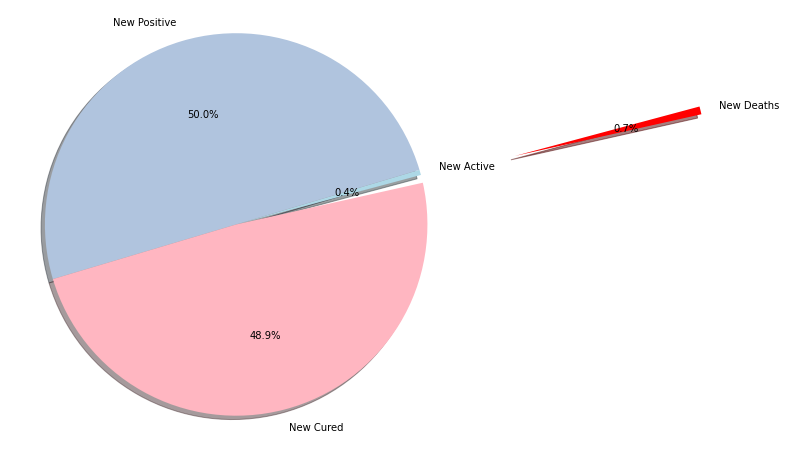

In [68]:
# Pie chart visualization for new values
my_data = cases_df.tolist()[4:]
my_labels = 'New Active', 'New Positive', 'New Cured', 'New Deaths'
my_explode = (0, 0, 0, 1.5)
my_colors = ['lightblue', 'lightsteelblue', 'lightpink', 'red']
fig1, ax1 = plt.subplots(figsize=(13, 8))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%',
        startangle=15, shadow=True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.show()

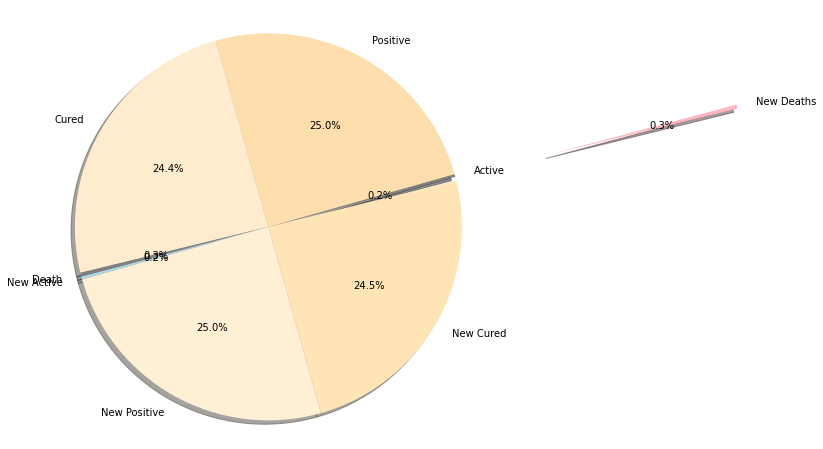

In [69]:
# Pie chart visualization for all data
my_data = cases_df.tolist()
my_labels = 'Active', 'Positive', 'Cured', 'Death', 'New Active', 'New Positive', 'New Cured', 'New Deaths'
my_explode = (0, 0, 0, 0, 0, 0, 0, 1.5)
my_colors = ['gray', 'navajowhite', 'blanchedalmond', 'grey', 'lightblue', 'papayawhip', 'moccasin', 'lightpink']
fig1, ax1 = plt.subplots(figsize=(13, 8))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%',
        startangle=15, shadow=True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.show()

In [70]:
# Giving figure size
plt.rcParams['figure.figsize']=(13, 8)

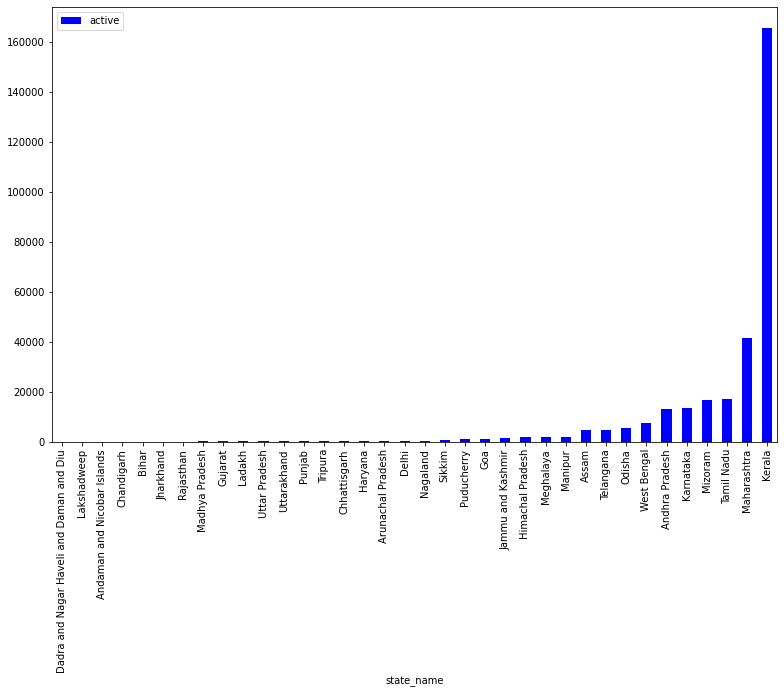

In [71]:
#States vs no. of active cases
df[['state_name', 'active']].groupby(['state_name']).mean().sort_values(by='active').plot.bar(color='blue')

Kerela has highest active cases as compared to other states

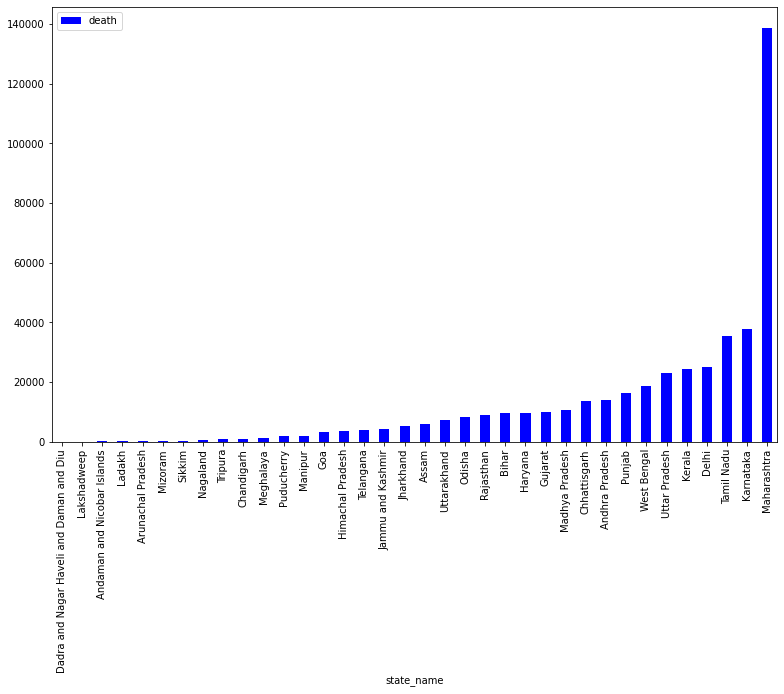

In [72]:
# No. of deaths vs states
df[['state_name', 'death']].groupby(['state_name']).mean().sort_values(by='death').plot.bar(color='blue')

Maharastra has the highest death toll

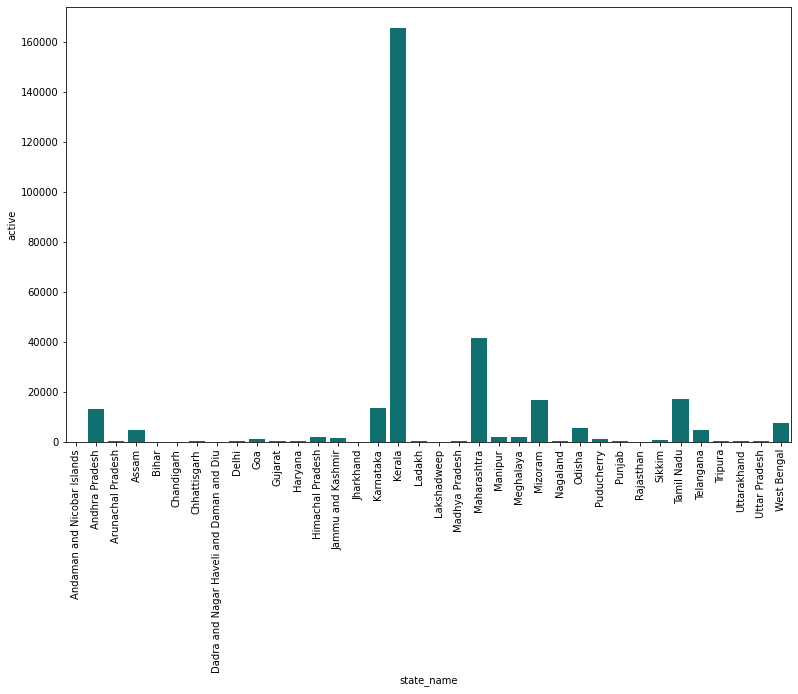

In [73]:
# No. of active cases vs states
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)
sns.barplot(x='state_name', y='active', color='teal', data=df)

Kerela has highest number of active cases followed by Maharashtra

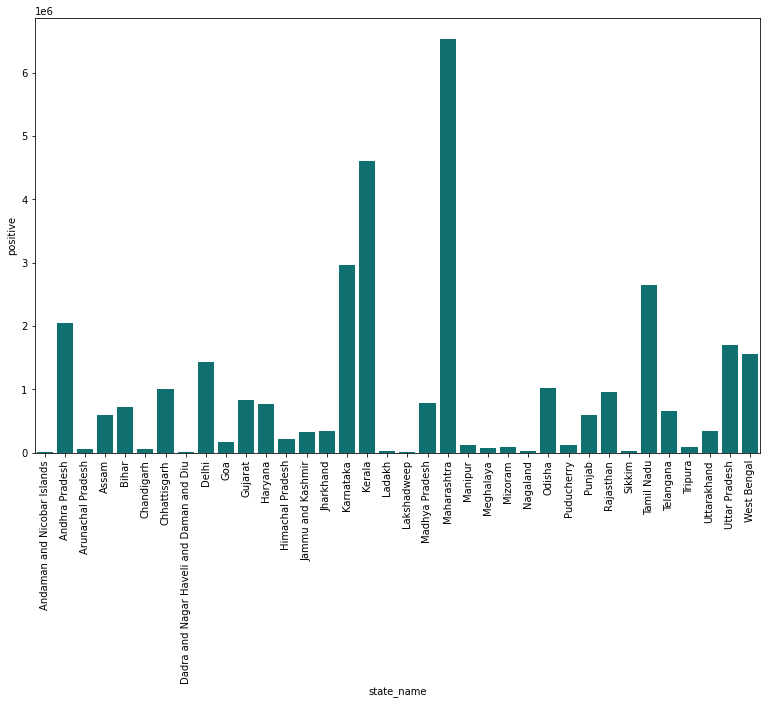

In [74]:
# No. of positive cases vs states
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)  # Rotate our x-labels
sns.barplot(x='state_name', y='positive', color='teal', data=df)

Maharashtra has the highest total number of positive cases, followed by Kerala.

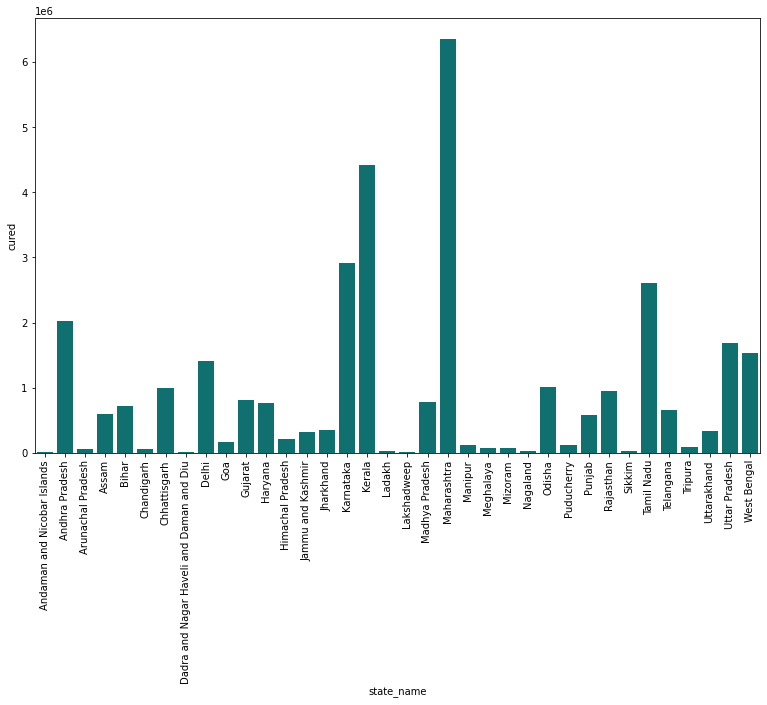

In [75]:
# No. of cured cases vs states
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90) 
sns.barplot(x='state_name', y='cured', color='teal', data=df)

Highest number of people have been cured in Maharashtra, followed by Kerala and Karnataka.

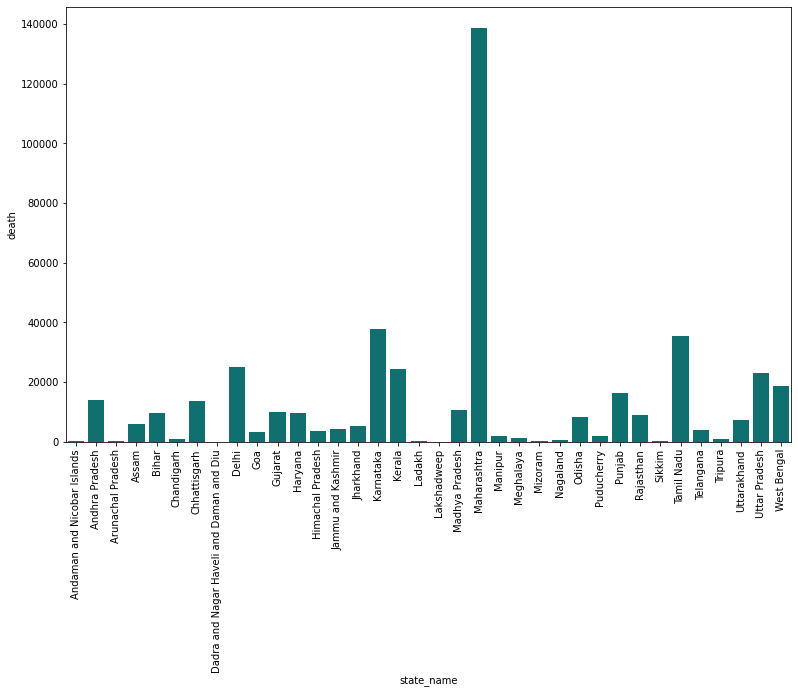

In [76]:
# No. of deaths vs states
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90) 
sns.barplot(x='state_name', y='death', color='teal', data=df)

Highest number of deaths were recorded in Maharashtra, followed by Karnataka and Tamil Nadu

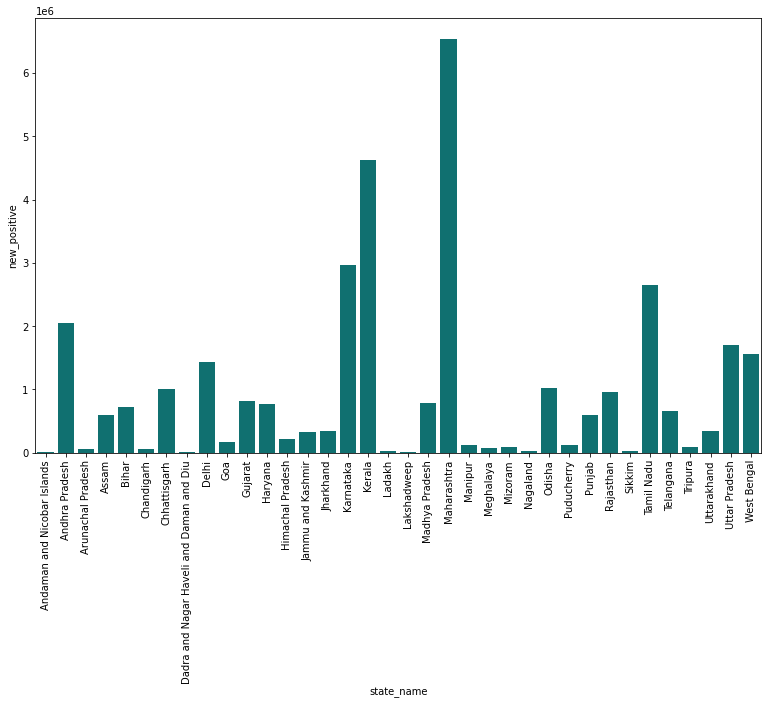

In [77]:
# No. of new positive cases vs states
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90) 
sns.barplot(x='state_name', y='new_positive', color='teal', data=df)

Maharashtra has highest number of new positive cases, followed by Kerala and Karnataka.

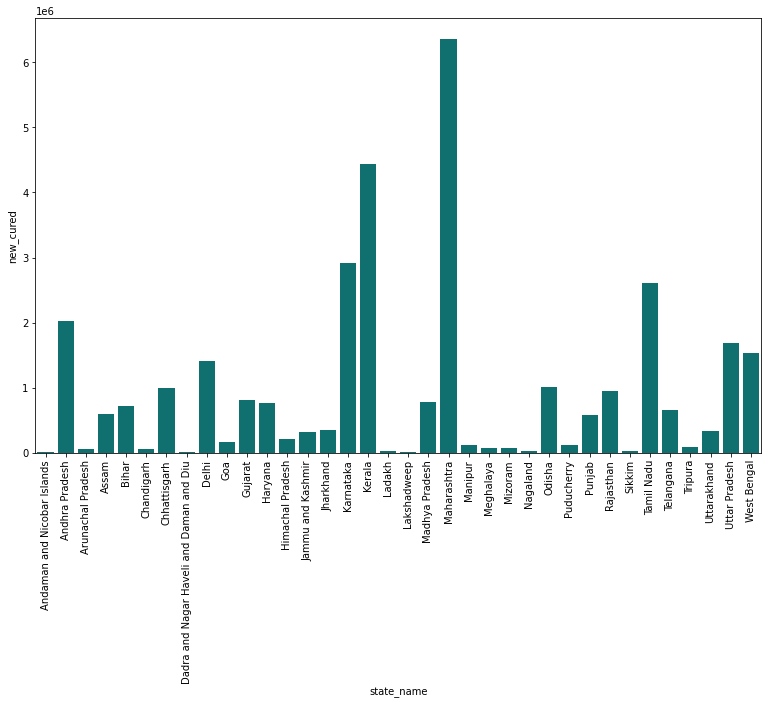

In [78]:
# No. of new cured cases vs states
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90) 
sns.barplot(x='state_name', y='new_cured', color='teal', data=df)

Maharashtra has highest number of new cured cases, followed by Kerela and Karnataka

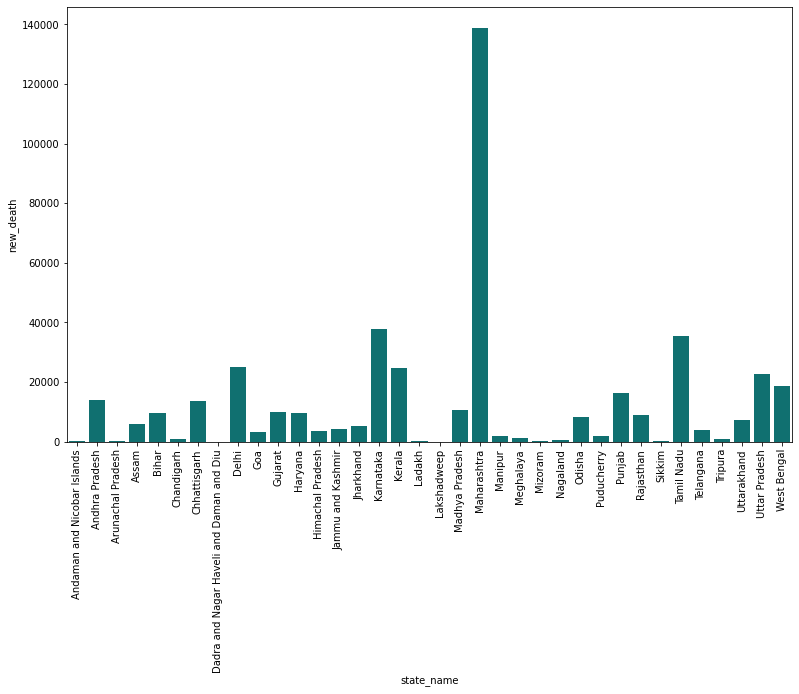

In [79]:
# No. of new death cases vs states
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90) 
sns.barplot(x='state_name', y='new_death', color='teal', data=df)

Maharashtra has recorded highest number of deaths for the day followed by Karnataka and Tamil Nadu

In [80]:
# Remove sno and state_code columns
df.drop(['sno', 'state_code'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [81]:
# Setting state_name as the index
df = df.set_index('state_name')
df.head()

,active,positive,cured,death,new_active,new_positive,new_cured,new_death
state_name,,,,,,,,
Andaman and Nicobar Islands,16,7618,7473,129,13,7618,7476,129
Andhra Pradesh,13208,2045657,2018324,14125,13048,2046841,2019657,14136
Arunachal Pradesh,358,54349,53717,274,323,54352,53755,274
Assam,4661,600423,589924,5838,4545,600619,590231,5843
Bihar,65,725937,716212,9660,68,725944,716216,9660


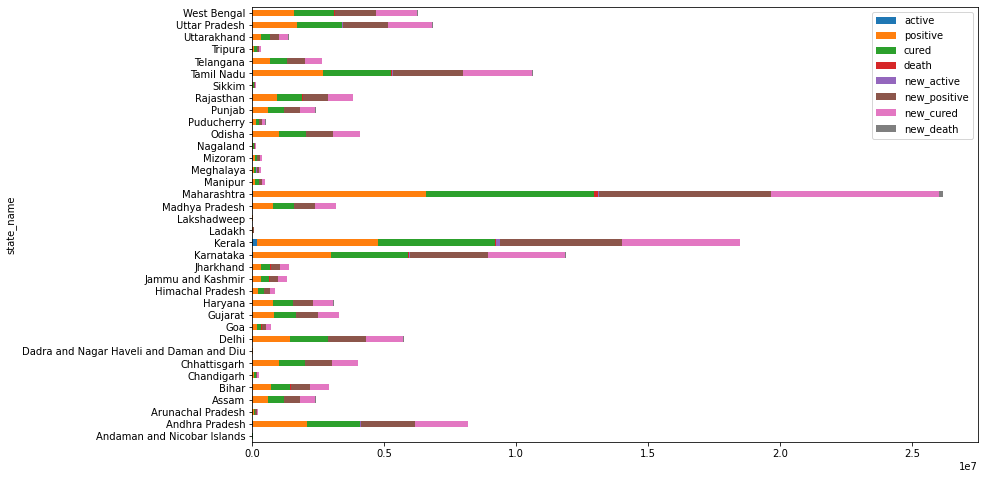

In [82]:
# Stacked bar plot
df.plot.barh(stacked=True, figsize=(13, 8))

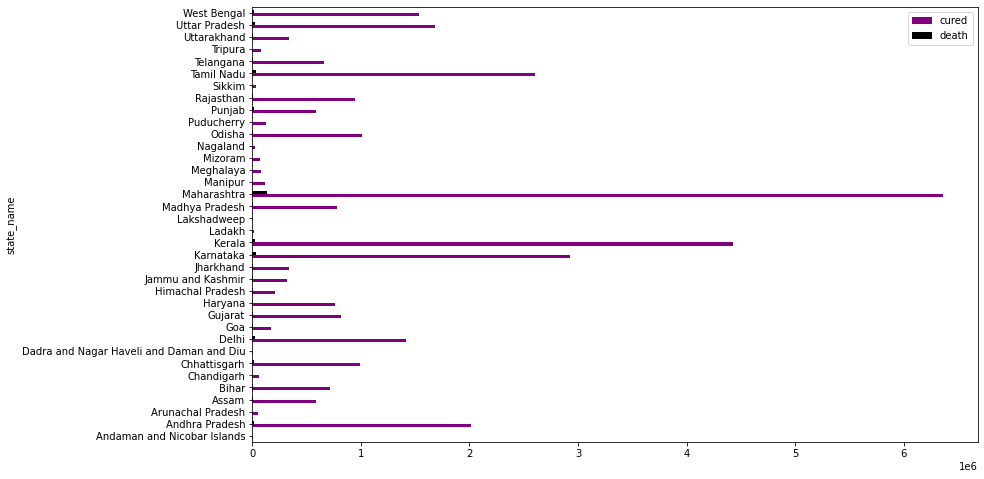

In [89]:
# Bar plot for cured and death
df1 = df[['cured', 'death']]
df1.plot.barh(color={'cured':'purple', 'death':'black'}, figsize=(13, 8))

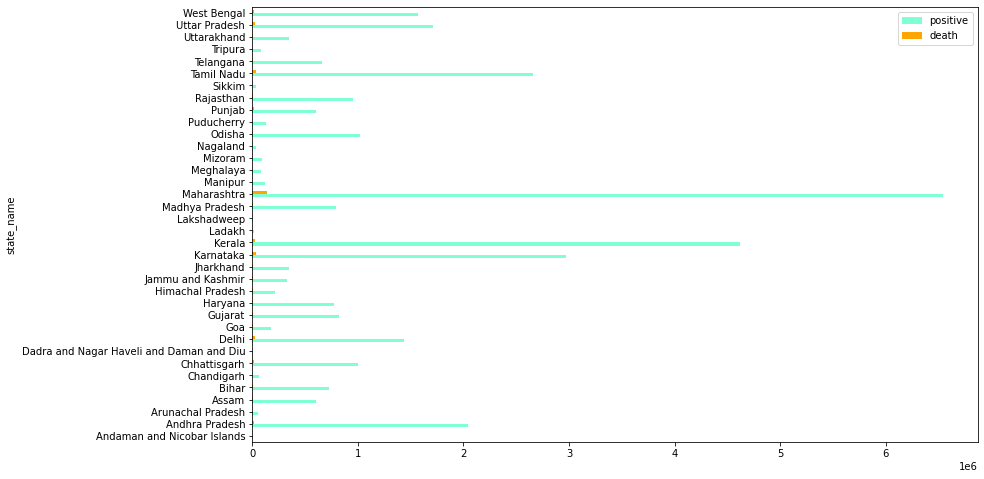

In [90]:
# Bar plot for positive cases and deaths
df2 = df[['positive', 'death']]
df2.plot.barh(color={'positive':'aquamarine', 'death':'orange'}, figsize=(13, 8))


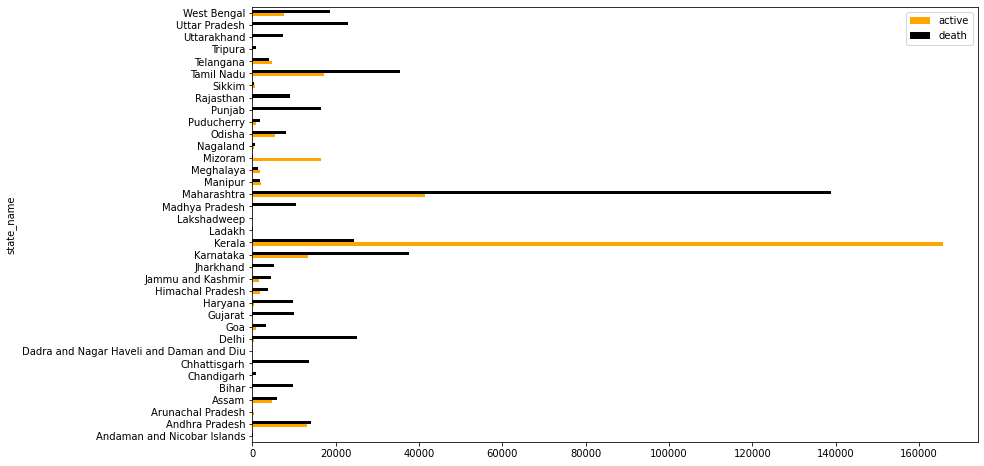

In [91]:
# Bar plot for active and death cases
df4=df[['active', 'death']]
df4.plot.barh(color={'active':'orange', 'death':'black'}, figsize=(13, 8))